<a href="https://colab.research.google.com/github/Guillermina0406/Web_Scraping/blob/main/Web_Scraping_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "http://books.toscrape.com/index.html"
response = requests.get(url)
html = response.content
scraped = BeautifulSoup(html, 'html.parser')

In [ ]:
scraped # scraped: Es un objeto BeautifulSoup que representa el HTML parseado.

<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="s

In [ ]:
print(scraped.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

In [ ]:
scraped.h1

<h1>All products</h1>

In [ ]:
h1_text = scraped.find("h1")
if h1_text:
    print(h1_text.text.strip())
else:
    print("No se encontró ningún elemento <h1>")

All products


In [ ]:
# Imprime el título de la página:
title_text = scraped.title.text.strip()
print(title_text)

All products | Books to Scrape - Sandbox


In [ ]:
# Imprime el título del primer libro:
title = scraped.article.h3.a["title"]
print(title)

A Light in the Attic


In [ ]:
# Imprime todos los títulos completos de la página:
links = scraped.find_all("a", title=True)
for link in links:
    print(link["title"])

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


In [ ]:
# Imprimir todos los precios desde la página, select es un método que permite buscar elementos usando selectores CSS.
# ".price_color": Es un selector CSS que selecciona todos los elementos que tienen la clase price_color.
prices = scraped.select(".price_color")
for price in prices:
    price = float(price.text.lstrip("£"))
    print(price)

51.77
53.74
50.1
47.82
54.23
22.65
33.34
17.93
22.6
52.15
13.99
20.66
17.46
52.29
35.02
57.25
23.88
37.59
51.33
45.17


In [ ]:
title_prices = []

articles = scraped.select(".product_pod")


for article in articles:
    title = article.h3.a["title"]
    price = article.find("p", class_="price_color")
    price_float = float(price.text.lstrip("£"))
    title_prices.append({title: price_float}) # Create a Dictionary and append to Array


print(title_prices)

[{'A Light in the Attic': 51.77}, {'Tipping the Velvet': 53.74}, {'Soumission': 50.1}, {'Sharp Objects': 47.82}, {'Sapiens: A Brief History of Humankind': 54.23}, {'The Requiem Red': 22.65}, {'The Dirty Little Secrets of Getting Your Dream Job': 33.34}, {'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull': 17.93}, {'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics': 22.6}, {'The Black Maria': 52.15}, {'Starving Hearts (Triangular Trade Trilogy, #1)': 13.99}, {"Shakespeare's Sonnets": 20.66}, {'Set Me Free': 17.46}, {"Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)": 52.29}, {'Rip it Up and Start Again': 35.02}, {'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991': 57.25}, {'Olio': 23.88}, {'Mesaerion: The Best Science Fiction Stories 1800-1849': 37.59}, {'Libertarianism for Beginners': 51.33}, {"It's Only the Himalayas": 45.17}]


# Extracting Stock Data Using a Python Library

In [ ]:
!pip install yfinance
!pip install matplotlib


In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
apple = yf.Ticker("AAPL")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2024-12-19 19:37:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-12-19 19:37:10 (950 MB/s) - ‘apple.json’ saved [5699/5699]



In [ ]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [ ]:
apple_info['country']

'United States'

In [ ]:
apple_share_price_data = apple.history(period="max")

In [ ]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [ ]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

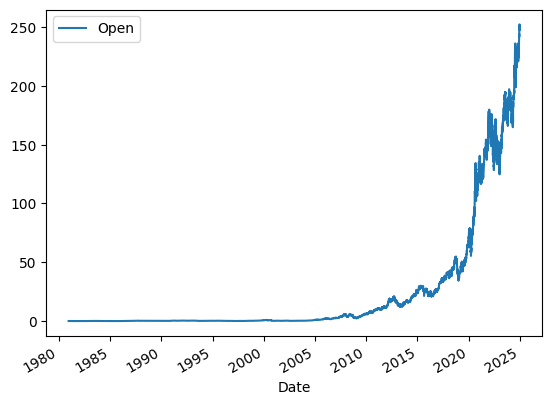

In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

In [ ]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2023-11-10 00:00:00-05:00,0.240000
2024-02-09 00:00:00-05:00,0.240000
2024-05-10 00:00:00-04:00,0.250000


<Axes: xlabel='Date'>

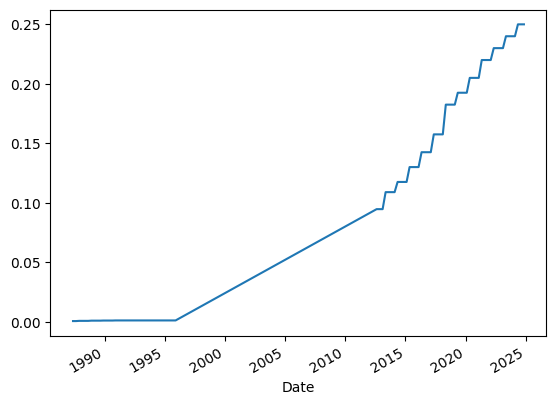

In [ ]:
apple.dividends.plot()

In [ ]:
amd = yf.Ticker("AMD")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2024-12-19 19:50:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2024-12-19 19:50:48 (1.03 GB/s) - ‘amd.json’ saved [5838/5838]



In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [ ]:
amd_info['country']

'United States'

In [ ]:
amd_info['sector']

'Technology'

In [ ]:
apple_share_price_data = apple.history(period="max")